# 3.7 softmax回归的简洁实现

In [1]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

print(torch.__version__)

1.3.0


## 3.7.1 获取和读取数据

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 3.7.2 定义和初始化模型

In [3]:
num_inputs = 784
num_outputs = 10

# class LinearNet(nn.Module):
#     def __init__(self, num_inputs, num_outputs):
#         super(LinearNet, self).__init__()
#         self.linear = nn.Linear(num_inputs, num_outputs)
#     def forward(self, x): # x shape: (batch, 1, 28, 28)
#         y = self.linear(x.view(x.shape[0], -1))
#         return y
    
# net = LinearNet(num_inputs, num_outputs)

class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x): # x shape: (batch, *, *, ...)
        return x.view(x.shape[0], -1)

from collections import OrderedDict
net = nn.Sequential(
        # FlattenLayer(),
        # nn.Linear(num_inputs, num_outputs)
        OrderedDict([
          ('flatten', FlattenLayer()),
          ('linear', nn.Linear(num_inputs, num_outputs))])
        )

In [4]:
init.normal_(net.linear.weight, mean=0, std=0.01)

Parameter containing:
tensor([[-0.0209,  0.0145, -0.0006,  ..., -0.0126,  0.0003,  0.0098],
        [ 0.0015,  0.0057, -0.0049,  ...,  0.0168, -0.0142,  0.0117],
        [-0.0038, -0.0094, -0.0042,  ..., -0.0203,  0.0284,  0.0054],
        ...,
        [ 0.0008, -0.0099,  0.0184,  ...,  0.0103,  0.0062, -0.0082],
        [ 0.0032, -0.0109,  0.0048,  ..., -0.0082,  0.0050, -0.0159],
        [ 0.0033, -0.0077,  0.0079,  ..., -0.0093,  0.0025,  0.0033]],
       requires_grad=True)

In [5]:
init.constant_(net.linear.bias, val=0)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

## 3.7.3 softmax和交叉熵损失函数

In [6]:
loss = nn.CrossEntropyLoss()

## 3.7.4 定义优化算法

In [7]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

## 3.7.5 训练模型

In [8]:
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0031, train acc 0.751, test acc 0.785
epoch 2, loss 0.0022, train acc 0.813, test acc 0.806
epoch 3, loss 0.0021, train acc 0.825, test acc 0.817
epoch 4, loss 0.0020, train acc 0.832, test acc 0.822
epoch 5, loss 0.0019, train acc 0.837, test acc 0.817


## 3.7.6 预测

In [9]:
X, y = iter(test_iter).next()

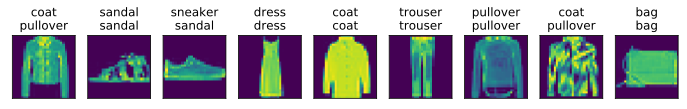

In [10]:
true_labels = d2l.get_fashion_mnist_labels(y.numpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[10:19], titles[10:19])